You can use free [Python notebook service](http://notebooks.azure.com) to run the below code. Because of security reasons, these kind of cloud services cant access any file on Internet. One of the exception the above service is that if the file is on Azure Storage Service, you can access them without problem.

You can also run the below samples in your loca Jupyter notebook server without any limitation etc.

### Azure Storage API
Almost all Cognitive Services API require input data. i.e. image data to detect faces. This section will show how to use the Azure Storage API to store data in your own cloud storage service with Python APIs.

#### Sign-up Azure Storage Service
1. Create an Azure Storage account with following steps:
    1. Go to the Azure Portal at http://portal.azure.com/ and sign in with your Azure account.
    2. Click the New icon on the top left of the Portal, then click Data + Storage > Storage Account. Click the Create button, then give the storage account a unique name and create a new resource group for it. When the storage account has been created, the Notifications button will flash a green SUCCESS and the storage account's blade is open to show that it belongs to the new resource group you created.
    3. Click the Access keys part in the storage account's blade. Take note of the **account name** and **key1**.

2. Using open source, cross-platform ["Storage Explorer"](http://storageexplorer.com/) tool and the above **account name** and **key1**, create a container under your storage service.

3. You can find the sample files under appendix folder of this repository. Upload these or similar own files into your Azure storage account, so they will be used in the python sample codes below.

Below steps uses [Microsoft Azure Storage SDK for Python](https://github.com/Azure/azure-storage-python) to access Azure Storage Service.

In [43]:
from azure.storage.blob import BlobService

# create blob service object to access the files in the storage
# You can access your account_name and account_key values at [Azure Management Portal](https://portal.azure.com)
blob_service = BlobService(account_name='mkmsstrg4ml', \
                           account_key='6kjUdYwgeP/TnlrGz1M/reUV2vbGdIh0oMJJVDsvQ\
                           xxCKMeHbhdiDZyBIQY6zKPQKFAw==')

List sample data files in a specific container (folder), so we can select one of them to work on it

In [44]:
# select container (folder) name where the files resides
container_name = 'sampledata'

# list files in the selected folder
generator = blob_service.list_blobs(container_name)

blob_prefix = 'https://{0}.blob.core.windows.net/{1}/{2}'

print("List of files in the container:")
for blob in generator:
    print(blob_prefix.format(blob_service.account_name, container_name, blob.name))

List of files in the container:
https://mkmsstrg4ml.blob.core.windows.net/sampledata/clinton.txt
https://mkmsstrg4ml.blob.core.windows.net/sampledata/debate.txt
https://mkmsstrg4ml.blob.core.windows.net/sampledata/emotion1.jpeg
https://mkmsstrg4ml.blob.core.windows.net/sampledata/emotion2.jpeg
https://mkmsstrg4ml.blob.core.windows.net/sampledata/emotion3.jpeg
https://mkmsstrg4ml.blob.core.windows.net/sampledata/face1.jpeg
https://mkmsstrg4ml.blob.core.windows.net/sampledata/face2.jpeg
https://mkmsstrg4ml.blob.core.windows.net/sampledata/face3.jpeg
https://mkmsstrg4ml.blob.core.windows.net/sampledata/face4.jpeg
https://mkmsstrg4ml.blob.core.windows.net/sampledata/ocr1.jpeg
https://mkmsstrg4ml.blob.core.windows.net/sampledata/ocr2.jpeg
https://mkmsstrg4ml.blob.core.windows.net/sampledata/speech1.wav
https://mkmsstrg4ml.blob.core.windows.net/sampledata/speech2.wav
https://mkmsstrg4ml.blob.core.windows.net/sampledata/speech3.wav
https://mkmsstrg4ml.blob.core.windows.net/sampledata/trump.tx

Read one of the image file from the blob storage as byte array. If you want update the below blob_name variable with one of the file available in the above file list

In [45]:
blob_name = 'emotion1.jpeg'
blob = blob_service.get_blob_to_bytes(container_name, blob_name)

Using PIL and matplotlib libraries, display the image file content to be processed.

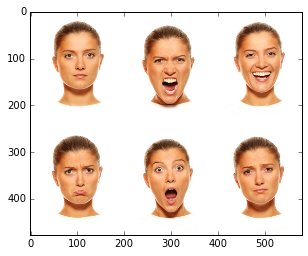

In [46]:
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import io

image_file_in_mem = io.BytesIO(blob)
img_bytes = Image.open(image_file_in_mem)
plt.imshow(img_bytes)

### SEARCH - Bing Image Search API
You can use Bing Image Search API to keyword based image search, get insights about an image, find trending images.  
Ref: https://msdn.microsoft.com/en-us/library/dn760791.aspx  
     https://www.microsoft.com/cognitive-services/en-us/bing-image-search-api

Call Bing Image Search API to get images with human faces (in later sections, will be used for face detection etc.) Change search parameters as you wish.

In [47]:
import requests     # used to make rest calls
import json # parse response result
import urllib

url_search_api = 'https://api.cognitive.microsoft.com/bing/v5.0/images/search?' # service address 
api_key = 'c8042821455b4dc095cceaa0cd0dc67e'          # Azure Cognitive API Key, replace with your own key

headers = {'Ocp-Apim-Subscription-Key':api_key}

params = urllib.parse.urlencode({
    'q': 'facial emotion',
    'count': '5',
    'offset': '0',
    'mkt': 'en-us',
    'safeSearch': 'Moderate',
    #'imageContent' : 'Portrait', 
    'imageType' : 'Photo' # AnimatedGif, Clipart, Line, Photo, Shopping
})

url = url_search_api + params

api_response = requests.get(url, headers=headers)

Print out the call response (which is in Json format) in pretty form.

In [48]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

{
  "_type": "Images",
  "displayRecipeSourcesBadges": true,
  "displayShoppingSourcesBadges": false,
  "instrumentation": {
    "pageLoadPingUrl": "https://www.bingapis.com/api/ping/pageload?IG=D51FBD0763D7416D9C3C8BFBBC61D25B&CID=1A2F1D54A4E2641723411497A5D36576&Type=Event.CPT&DATA=0"
  },
  "nextOffsetAddCount": 5,
  "pivotSuggestions": [
    {
      "pivot": "facial",
      "suggestions": [
        {
          "displayText": "Different",
          "searchLink": "https://api.cognitive.microsoft.com/api/v5/images/search?q=Different+Emotions&tq=%7b%22pq%22%3a%22facial+emotion%22%2c%22qs%22%3a%5b%7b%22cv%22%3a%22facial%22%2c%22pv%22%3a%22facial%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22emotion%22%2c%22pv%22%3a%22emotion%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22Different%22%2c%22pv%22%3a%22%22%2c%22hps%22%3afalse%2c%22iqp%22%3atrue%7d%5d%7d",
          "text": "Different Emotions",
          "thumbnail": {
            "thumbnailUrl": "https:/

Display search resulting images

In [49]:
from IPython.display import Image as ipImage, display
from urllib.parse import urlparse, parse_qs

for j in res_json['value']:
    c_url = j['contentUrl']
    pr = urlparse(c_url)
    ru = parse_qs(pr.query)
    img_url = ru['r'][0]
    img = ipImage(url=img_url, width=150, height=200)
    
    display(img)
    print(img_url)

http://2.bp.blogspot.com/-moxJdxU6RlA/TelehzI8wQI/AAAAAAAAAiY/oTiET8alcNg/s1600/facial_expressions.jpg


http://i.livescience.com/images/i/000/064/346/original/facial-expressions.jpg?1396280588


http://www.happehtheory.com/wp-content/uploads/2014/04/21_Emotions-WomanHappilySurprisedAndFiveOthers.jpg


http://www.viralspell.com/wp-content/uploads/2014/04/Larremore-3.jpg


http://static.guim.co.uk/sys-images/Guardian/Pix/pictures/2009/03/02/understanding5.jpg


### VISION - Face API
You can use Face API to Detect, Find Similar, Group, Identify, Verify faces.  
Ref: https://www.microsoft.com/cognitive-services/en-us/face-api

Call Cognitive Services Face API to detect facial features in the image

In [50]:
# load image file to process
blob_name = 'face4.jpeg'
blob = blob_service.get_blob_to_bytes(container_name, blob_name)
image_file_in_mem = io.BytesIO(blob)
img_bytes = Image.open(image_file_in_mem)

In [51]:
import requests
import urllib

url_face_api = 'https://api.projectoxford.ai/face/v1.0/detect' # service address 
api_key = 'd469dbc2ba424afd86c0ba0716a62ca8'          # Azure Cognitive API Key, replace with your own key

headers = {'Content-Type': 'application/octet-stream', 'Ocp-Apim-Subscription-Key':api_key}

params = urllib.parse.urlencode({
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'true',
    'returnFaceAttributes': 'age,gender,smile,facialHair,headPose,glasses',
})

query_string = '?{0}'.format(params)

url = url_face_api + query_string

api_response = requests.post(url, headers=headers, data=blob)

Print out the call response (which is in Json format) in pretty form.

In [52]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

[
  {
    "faceAttributes": {
      "age": 29.0,
      "facialHair": {
        "beard": 0.0,
        "moustache": 0.0,
        "sideburns": 0.0
      },
      "gender": "female",
      "glasses": "NoGlasses",
      "headPose": {
        "pitch": 0.0,
        "roll": -5.4,
        "yaw": -4.6
      },
      "smile": 0.99
    },
    "faceId": "89303c38-b9b3-4802-8b2b-a0bd6ccea2ed",
    "faceLandmarks": {
      "eyeLeftBottom": {
        "x": 1447.1,
        "y": 1248.3
      },
      "eyeLeftInner": {
        "x": 1458.0,
        "y": 1244.8
      },
      "eyeLeftOuter": {
        "x": 1435.4,
        "y": 1248.0
      },
      "eyeLeftTop": {
        "x": 1446.3,
        "y": 1243.9
      },
      "eyeRightBottom": {
        "x": 1527.7,
        "y": 1240.6
      },
      "eyeRightInner": {
        "x": 1515.0,
        "y": 1239.3
      },
      "eyeRightOuter": {
        "x": 1540.6,
        "y": 1236.8
      },
      "eyeRightTop": {
        "x": 1527.2,
        "y": 1236.1
      },


Get detected face coordiates (bounding squares) from call response and draw red square borders for females, blue for males.

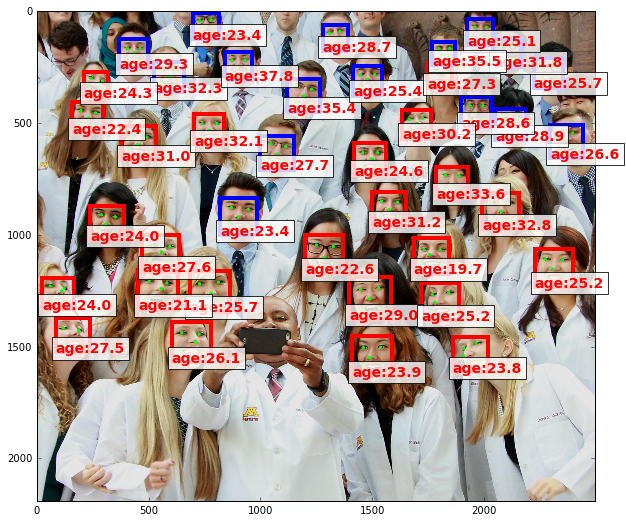

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(10, 10))
ax = plt.gca()

# Draw face rectangles
for i in res_json:
    fr = i['faceRectangle'] # get faceRectangle node per detected face in the image

    pc = 'red' # patch color
    if i['faceAttributes']['gender'] == 'male':
        pc = 'blue'

    ax.add_patch(
        patches.Rectangle(
            (fr['left'], fr['top']), fr['width'], fr['height'],
            fill=False, linewidth=4, color=pc)
    )
    
    ax.text(fr['left'], fr['top']+fr['height'], 
            'age:'+str(i['faceAttributes']['age']), 
            fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
    

ps = 5       # patch size
pc = '#00FF00'   # patch color

# Draw eye, nose, mouth
for i in res_json:
    fl = i['faceLandmarks']

    # left eye
    ax.add_patch(patches.Circle((fl['pupilLeft']['x'], fl['pupilLeft']['y']), ps, color=pc))

    # right eye
    ax.add_patch(patches.Circle((fl['pupilRight']['x'], fl['pupilRight']['y']), ps, color=pc))

    # mouth
    ax.add_patch(patches.Circle((fl['mouthLeft']['x'], fl['mouthLeft']['y']), ps, color=pc))
    ax.add_patch(patches.Circle((fl['mouthRight']['x'], fl['mouthRight']['y']), ps, color=pc))

    # nose
    ax.add_patch(patches.Circle((fl['noseTip']['x'], fl['noseTip']['y']), ps, color=pc))

plt.imshow(img_bytes)

### VISION - Emotion API
You can use Emotion API to Detect, emotion recognition in image, in video.  
Ref: https://www.microsoft.com/cognitive-services/en-us/emotion-api

Below sample shows how to call Cognitive Services Emotion API to detect facial emotion in the image

In [54]:
# load image file to process
blob_name = 'emotion1.jpeg'
blob = blob_service.get_blob_to_bytes(container_name, blob_name)
image_file_in_mem = io.BytesIO(blob)
img_bytes = Image.open(image_file_in_mem)

In [55]:
import requests
import urllib

url_emotion_api = 'https://api.projectoxford.ai/emotion/v1.0/recognize' # service address 
api_key = '8eae1ba129df43a289015fb45554e074'          # Azure Cognitive API Key, replace with your own key

headers = {'Content-Type': 'application/octet-stream', 'Ocp-Apim-Subscription-Key':api_key}

api_response = requests.post(url_emotion_api, headers=headers, data=blob)

Print out the call response (which is in Json format) in pretty form.

In [56]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

[
  {
    "faceRectangle": {
      "height": 96,
      "left": 250,
      "top": 311,
      "width": 96
    },
    "scores": {
      "anger": 9.717317e-07,
      "contempt": 2.304727e-10,
      "disgust": 3.5601154e-08,
      "fear": 0.000219319409,
      "happiness": 1.42391636e-08,
      "neutral": 2.45037057e-07,
      "sadness": 1.42161449e-09,
      "surprise": 0.9997794
    }
  },
  {
    "faceRectangle": {
      "height": 93,
      "left": 59,
      "top": 68,
      "width": 93
    },
    "scores": {
      "anger": 1.24233821e-07,
      "contempt": 1.05807876e-05,
      "disgust": 3.67186681e-09,
      "fear": 2.02973124e-10,
      "happiness": 5.606885e-07,
      "neutral": 0.99998647,
      "sadness": 2.08266215e-06,
      "surprise": 1.75841222e-07
    }
  },
  {
    "faceRectangle": {
      "height": 93,
      "left": 59,
      "top": 316,
      "width": 93
    },
    "scores": {
      "anger": 0.09300121,
      "contempt": 0.05747567,
      "disgust": 0.170698524,
      "fe

Get detected face coordiates (bounding squares) from call response and draw borders.

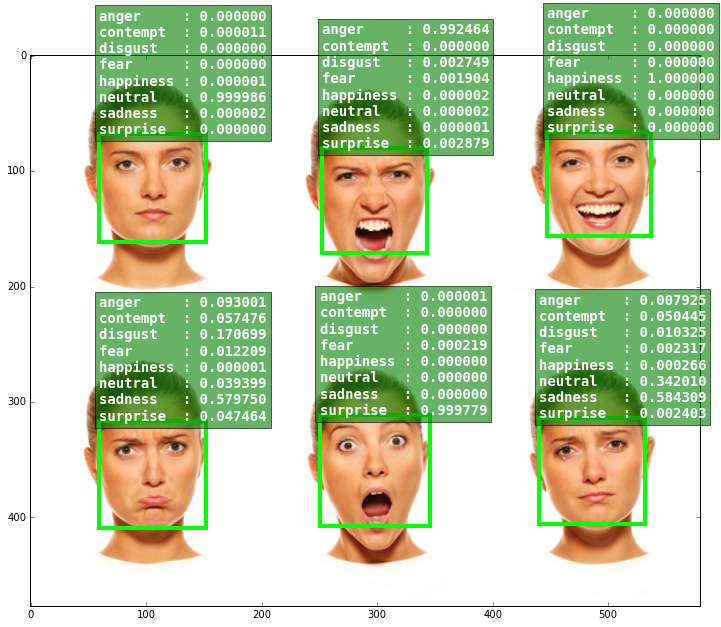

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(12, 12))
ax = plt.gca()

# Draw face rectangles
for i in res_json:
    pc = '#00FF00' # patch color
    
    fr = i['faceRectangle'] # get faceRectangle node per detected face in the image
    ax.add_patch(
        patches.Rectangle(
            (fr['left'], fr['top']), fr['width'], fr['height'],
            fill=False, linewidth=4, color=pc)
    )
    
    s = i['scores']
    
    frm_txt = '{0: <10}: {1:>.6f}\n{2: <10}: {3:>.6f}\n{4: <10}: {5:>.6f}\n{6: <10}: {7:>.6f}\n\
{8: <10}: {9:>.6f}\n{10: <10}: {11:>.6f}\n{12: <10}: {13:>.6f}\n{14: <10}: {15:>.6f}'
    
    lbls =     ['anger', s['anger'],\
                'contempt', s['contempt'],\
                'disgust', s['disgust'],\
                'fear', s['fear'],\
                'happiness', s['happiness'],\
                'neutral', s['neutral'],\
                'sadness', s['sadness'],\
                'surprise', s['surprise']]
    
    ax.text(fr['left'], fr['top'], frm_txt.format(*lbls), 
            fontsize=14, weight='bold', color='white', family='monospace',
            bbox=dict(facecolor='green', alpha=0.6))    

plt.imshow(img_bytes)

### VISION - Computer Vision API - Analyze
You can use Computer Vision API to analyze visual content in different ways based on inputs and user choices.  
Ref: https://www.microsoft.com/cognitive-services/en-us/Computer-Vision-API/documentation 

Below sample shows how to call Cognitive Services Computer Vision API to detect image features.

In [58]:
from IPython.display import Image as ipImage, display
img_url = 'https://portalstoragewuprod.azureedge.net/vision/Analysis/7-1.jpg'
#img_url = 'http://i.ebayimg.com/00/s/NTUxWDg3MQ==/z/IawAAOSw7NNT6NZY/$_32.JPG'
    
img = ipImage(url=img_url, width=250, height=250)
display(img)

In [59]:
import requests
import urllib

url_vision_api = 'https://api.projectoxford.ai/vision/v1.0/analyze' # service address 
api_key = '3ae10be9a45442f5910434e1af6c52dd'          # Azure Cognitive API Key, replace with your own key

headers = {'Content-Type': 'application/json', 'Ocp-Apim-Subscription-Key':api_key}

params = urllib.parse.urlencode({
    'visualFeatures': 'Categories,Tags,Description,Faces,ImageType,Color,Adult',
})

query_string = '?{0}'.format(params)

url = url_vision_api + query_string

body = '{\'url\':\'' + img_url + '\'}'

api_response = requests.post(url, headers=headers, data=body)

Print out the call response (which is in Json format) in pretty form.

In [60]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

{
  "adult": {
    "adultScore": 0.007829328067600727,
    "isAdultContent": false,
    "isRacyContent": false,
    "racyScore": 0.01115757692605257
  },
  "categories": [
    {
      "name": "outdoor_",
      "score": 0.00390625
    },
    {
      "name": "outdoor_oceanbeach",
      "score": 0.44921875
    },
    {
      "name": "sky_cloud",
      "score": 0.41015625
    }
  ],
  "color": {
    "accentColor": "002844",
    "dominantColorBackground": "Blue",
    "dominantColorForeground": "White",
    "dominantColors": [
      "Blue",
      "White"
    ],
    "isBWImg": false
  },
  "description": {
    "captions": [
      {
        "confidence": 0.8303274989717196,
        "text": "a large body of water"
      }
    ],
    "tags": [
      "water",
      "outdoor",
      "ocean",
      "blue",
      "man",
      "large",
      "sitting",
      "top",
      "clouds",
      "sunny",
      "day",
      "standing",
      "body",
      "boat",
      "dark",
      "umbrella",
      "wave",
 

### VISION - Computer Vision API - OCR
You can use Computer Vision API to read text in images.  
Ref: https://www.microsoft.com/cognitive-services/en-us/Computer-Vision-API/documentation
Below sample shows how to call Cognitive Services Computer Vision API to detect text features.

In [61]:
# load image file to process
blob_name = 'ocr1.jpeg'
blob = blob_service.get_blob_to_bytes(container_name, blob_name)
image_file_in_mem = io.BytesIO(blob)
img_bytes = Image.open(image_file_in_mem)

# Show the original image that we will process
img_url = 'https://mkmsstrg4ml.blob.core.windows.net/sampledata/ocr1.jpeg'
img = ipImage(url=img_url, width=250, height=250)
display(img)

In [62]:
import requests
import urllib

url_vision_api = 'https://api.projectoxford.ai/vision/v1.0/ocr' # service address 
api_key = '3ae10be9a45442f5910434e1af6c52dd'          # Azure Cognitive API Key, replace with your own key

headers = {'Content-Type': 'application/octet-stream', 'Ocp-Apim-Subscription-Key':api_key}

params = urllib.parse.urlencode({
    'language': 'unk',
    'detectOrientation': 'true',
})

query_string = '?{0}'.format(params)

url = url_vision_api + query_string

api_response = requests.post(url, headers=headers, data=blob)

Print out the call response (which is in Json format) in pretty form.

In [63]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

{
  "language": "en",
  "orientation": "Up",
  "regions": [
    {
      "boundingBox": "14,30,364,184",
      "lines": [
        {
          "boundingBox": "14,30,287,38",
          "words": [
            {
              "boundingBox": "14,40,90,28",
              "text": "LIFE"
            },
            {
              "boundingBox": "139,35,38,25",
              "text": "IS"
            },
            {
              "boundingBox": "211,30,90,26",
              "text": "LIKE"
            }
          ]
        },
        {
          "boundingBox": "67,77,257,27",
          "words": [
            {
              "boundingBox": "67,86,93,18",
              "text": "RIDING"
            },
            {
              "boundingBox": "182,84,11,14",
              "text": "A"
            },
            {
              "boundingBox": "214,77,110,20",
              "text": "BICYCLE"
            }
          ]
        },
        {
          "boundingBox": "38,122,318,36",
          "words": [
 

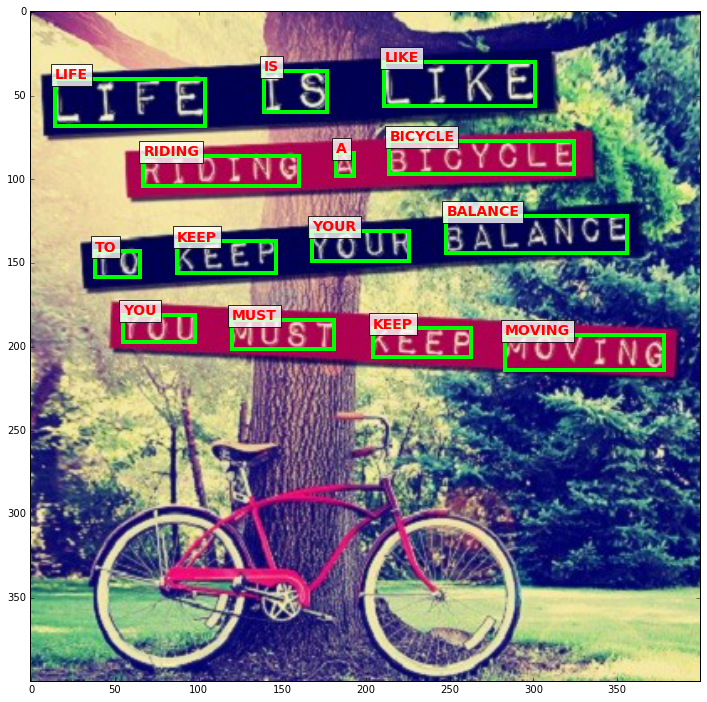

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(12, 12))
ax = plt.gca()

text_angle = 0
try:
    text_angle = res_json['textAngle']
except:
    pass

# Draw OCR rectangles
for i in res_json['regions']:
    pl = i['lines']
    for k in pl:
        words = k['words']
        for l in words:
            bb = l['boundingBox']
            txt = l['text']
            
            bb = list(map(int, bb.split(',')))
            
            ax.add_patch(
                patches.Rectangle(
                    (bb[0], bb[1]), bb[2], bb[3], angle=text_angle,
                    fill=False, linewidth=4, color='#00FF00')
            )
            
            ax.text(bb[0], bb[1], txt, 
                    fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
            
plt.imshow(img_bytes)

### SPEECH - BING Speech API - TTS

Ref: https://www.microsoft.com/cognitive-services/en-us/speech-api/documentation/overview 

The Speech Recognition API provides the ability to convert text to spoken audio by sending text to Microsoftâs servers in the cloud.

In [65]:
import requests

# Get access token to use the speech services
url_token_api = 'https://api.cognitive.microsoft.com/sts/v1.0/issueToken' # service address 
api_key = '39f61de6d28e4667bbfda88dd37b12ce'          # Azure Cognitive API Key, replace with your own key

headers = {'Content-Length': '0', 'Ocp-Apim-Subscription-Key':api_key}

api_response = requests.post(url_token_api, headers=headers)

access_token = str(api_response.content.decode('utf-8'))


text = '<speak version=\'1.0\' xml:lang=\'en-US\'>\
            <voice xml:lang=\'en-US\' xml:gender=\'Female\' \
                        name=\'Microsoft Server Speech Text to Speech Voice (en-US, ZiraRUS)\'>\
                The Text-To-Speech API enables you to build smart apps that can speak. You can test it now, \
                simply choose your target language, add your sentences then click on the play button to \
                see how speech synthesis works. \
            </voice>\
        </speak>'


# Call Speech to text service
url_tts_api = 'https://speech.platform.bing.com/synthesize' # service address 

headers = {'Authorization': 'Bearer {0}'.format(access_token), \
           'Content-Length': len(text), \
           'Content-type': 'text/plain; charset=utf-8',\
           'X-Microsoft-OutputFormat': 'riff-16khz-16bit-mono-pcm'}

api_response = requests.post(url_tts_api, headers=headers, data=text)

Play the audio content returned by the service call above.

In [66]:
from IPython.display import Audio, display

audio_bytes = Audio(data=api_response.content)
display(audio_bytes)

### SPEECH - BING Speech API - STT

Ref: https://www.microsoft.com/cognitive-services/en-us/speech-api/documentation/overview 

The Speech Recognition API provides the ability to convert spoken audio to text by sending audio to Microsoftâs servers in the cloud. Developers have a choice of using the REST API or the Client Library (for real-time streaming).

In [67]:
from IPython.display import Audio, display

# load speech file to process
blob_name = 'speech3.wav'
blob = blob_service.get_blob_to_bytes(container_name, blob_name)

wav_bytes = Audio(data=blob)
display(wav_bytes)

In [68]:
import requests
import urllib
import uuid

# Get access token to use the speech services
url_token_api = 'https://api.cognitive.microsoft.com/sts/v1.0/issueToken' # service address 
api_key = '39f61de6d28e4667bbfda88dd37b12ce'          # Azure Cognitive API Key, replace with your own key

headers = {'Content-Length': '0', 'Ocp-Apim-Subscription-Key':api_key}

api_response = requests.post(url_token_api, headers=headers)

access_token = str(api_response.content.decode('utf-8'))


# Call Speech to text service
url_stt_api = 'https://speech.platform.bing.com/recognize' # service address 

headers = {'Authorization': 'Bearer {0}'.format(access_token), \
           'Content-Length': len(blob), \
           'Content-type': 'audio/wav', \
           'codec': 'audio/pcm', \
           'samplerate': '16000'}

params = urllib.parse.urlencode({
    'scenarios': 'ulm',
    'appid': 'D4D52672-91D7-4C74-8AD8-42B1D98141A5', # dont change, it is fixed by design
    'locale': 'en-US', # speech in english
    'device.os': 'PC',
    'version': '3.0',
    'format': 'json', # return value in json
    'instanceid': str(uuid.uuid1()), # any guid
    'requestid': str(uuid.uuid1()),
})

api_response = requests.post(url_stt_api, headers=headers, params=params, data=blob)

In [69]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

{
  "header": {
    "lexical": "remember where we were eight years ago we had the worst financial crisis the great recession the worst since the nineteen thirties",
    "name": "remember where we were 8 years ago we had the worst financial crisis the great recession the worst since the 1930s",
    "properties": {
      "HIGHCONF": "1",
      "requestid": "e30f5e4c-38d3-4f3e-ae43-c9216e7e6ea1"
    },
    "scenario": "ulm",
    "status": "success"
  },
  "results": [
    {
      "confidence": "0.9436696",
      "lexical": "remember where we were eight years ago we had the worst financial crisis the great recession the worst since the nineteen thirties",
      "name": "remember where we were 8 years ago we had the worst financial crisis the great recession the worst since the 1930s",
      "properties": {
        "HIGHCONF": "1"
      },
      "scenario": "ulm"
    }
  ],
  "version": "3.0"
}


### LANGUAGE - BING Text Analytics API - Sentiment, Key Phrases, Languages
Extracts information from your text.
ref: https://azure.microsoft.com/en-us/documentation/articles/cognitive-services-text-analytics-quick-start/

In [70]:
import requests

# Get access token to use the speech services
url_sentiment_api = 'https://westus.api.cognitive.microsoft.com/text/analytics/v2.0/sentiment' # service address 
url_keyphrases_api = 'https://westus.api.cognitive.microsoft.com/text/analytics/v2.0/keyPhrases' # service address 
url_languages_api = 'https://westus.api.cognitive.microsoft.com/text/analytics/v2.0/languages' # service address 
api_key = 'c97786c34cc24041aedfa2a1c64d9aee'          # Azure Cognitive API Key, replace with your own key

headers = {'Content-Length': '0', 'Ocp-Apim-Subscription-Key':api_key}

text = '{                                           \
            "documents": [                          \
                {                                   \
                    "language": "en",               \
                    "id": "1",                      \
                    "text": "remember where we were eight years ago we had the worst financial crisis \
                    the great recession the worst since the nineteen thirties"        \
                },                                  \
            ]                                       \
        }'                                          \


headers = {'Ocp-Apim-Subscription-Key':api_key, \
           'Content-type': 'application/json',\
           'Accept': 'application/json'}

api_response_sentiment = requests.post(url_sentiment_api, headers=headers, data=text)
api_response_keyphrases = requests.post(url_keyphrases_api, headers=headers, data=text)
api_response_languages = requests.post(url_languages_api, headers=headers, data=text)

In [71]:
import json
res_json_sentiment = json.loads(api_response_sentiment.content.decode('utf-8'))
res_json_keyphrases = json.loads(api_response_keyphrases.content.decode('utf-8'))
res_json_languages = json.loads(api_response_languages.content.decode('utf-8'))

print('// Sentiment analysis result:')
print(json.dumps(res_json_sentiment, indent=2, sort_keys=True))
print('\n\n// Key phrase analysis result:')
print(json.dumps(res_json_keyphrases, indent=2, sort_keys=True))
print('\n\n//Language analysis result:')
print(json.dumps(res_json_languages, indent=2, sort_keys=True))

// Sentiment analysis result:
{
  "documents": [
    {
      "id": "1",
      "score": 0.111496
    }
  ],
  "errors": []
}


// Key phrase analysis result:
{
  "documents": [
    {
      "id": "1",
      "keyPhrases": [
        "worst financial crisis",
        "great recession",
        "thirties",
        "years"
      ]
    }
  ],
  "errors": []
}


//Language analysis result:
{
  "documents": [
    {
      "detectedLanguages": [
        {
          "iso6391Name": "en",
          "name": "English",
          "score": 1.0
        }
      ],
      "id": "1"
    }
  ],
  "errors": []
}
